In [109]:
import pandas as pd
df = pd.read_csv('smoking.csv')
df = df[:10000]

In [110]:
from sklearn.utils import resample

#Trova la classe target più rappresentata
target_max = df['smoking'].value_counts().idxmax()

#Suddividi il dataset in due parti in base alla classe target
df_magg = df[df['smoking'] == target_max]
df_min = df[df['smoking'] != target_max]

#Riduci il numero di campioni nella classe maggioritaria al numero di campioni nella classe minoritaria
df_magg_downsampled = resample( df_magg,
                                replace=False,  # campioni presi senza sostituzione
                                n_samples=len(df_min),  # numero di campioni uguale alla classe minoritaria
                                random_state=42)  # per riproducibilità

#Unisci i due sottoinsiemi bilanciati
df_filtered = pd.concat([df_magg_downsampled, df_min])

print("\nCounts nel dataset partizionato:\n", df_filtered['smoking'].value_counts())


Counts nel dataset partizionato:
 smoking
0    3616
1    3616
Name: count, dtype: int64


In [111]:
df_filtered = df_filtered.drop(['ID','height(cm)','oral'], axis=1)
df_filtered['tartar'] = df_filtered['tartar'].apply(lambda x: 1 if x == 'Y' else 0)
df_filtered['gender'] = df_filtered['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [112]:
variabili_pca = list(df_filtered.columns[:-1])
print(variabili_pca)

['gender', 'age', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar']


In [113]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered[variabili_pca])
scaled_data # nuovo dataset con standardizzate le colonne

array([[ 0.65646461, -0.7277086 , -0.92982294, ..., -0.44943218,
         1.82639848,  0.873277  ],
       [-1.52331136, -0.3106889 , -0.92982294, ..., -0.50547494,
         1.82639848,  0.873277  ],
       [-1.52331136,  0.5233505 , -0.53929623, ..., -0.52415586,
        -0.54752564,  0.873277  ],
       ...,
       [ 0.65646461, -1.1447283 , -0.53929623, ..., -0.24394204,
        -0.54752564, -1.14511203],
       [ 0.65646461, -1.561748  ,  2.19439079, ...,  0.12967638,
        -0.54752564, -1.14511203],
       [ 0.65646461,  1.35738989, -0.14876951, ..., -0.26262296,
        -0.54752564,  0.873277  ]])

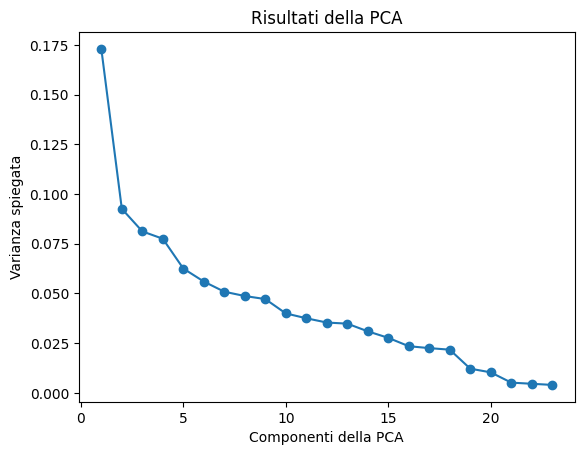

In [114]:
import matplotlib.pyplot as plt

pca = PCA().fit(scaled_data)

# Crea un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [145]:
# Applica la PCA per ridurre la dimensionalità dei dati
pca = PCA(n_components=15).fit(scaled_data)
pca_data = pca.transform(scaled_data)
# Quantifichiamo la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

[0.17298943 0.09258424 0.08122424 0.07752174 0.06254185 0.05599266
 0.05088769 0.04871564 0.04718104 0.03997829 0.03753255 0.03537881
 0.03482817 0.03096321 0.02768274]


In [146]:
sum = 0
for data in pca.explained_variance_ratio_:
    sum += data
print(sum)

0.8960023175219907


In [147]:
pca_df = pd.DataFrame(abs(pca.components_[:15]), columns=df_filtered.columns[:-1],
                     index=['PC1','PC2','PC3','PC4','PC5',
                            'PC6','PC7','PC8','PC9','PC10','PCA11','PCA12','PCA13','PCA14','PCA15'])
pca_df

gender       age  weight(kg)  waist(cm)  eyesight(left)  \
PC1    0.364628  0.117692    0.403997   0.372555        0.074885   
PC2    0.209535  0.422121    0.134549   0.033495        0.288254   
PC3    0.055866  0.099802    0.039824   0.077948        0.058852   
PC4    0.079846  0.150217    0.056975   0.089401        0.078871   
PC5    0.123904  0.086780    0.034679   0.069427        0.075650   
PC6    0.006380  0.057009    0.045271   0.094906        0.460848   
PC7    0.017641  0.142670    0.019686   0.025026        0.224344   
PC8    0.272855  0.061632    0.009268   0.105396        0.279480   
PC9    0.080770  0.101267    0.202518   0.213238        0.084888   
PC10   0.215968  0.009367    0.237829   0.279173        0.011465   
PCA11  0.028393  0.417787    0.217450   0.147195        0.211008   
PCA12  0.022621  0.075902    0.080570   0.108983        0.099170   
PCA13  0.042535  0.003628    0.292442   0.350821        0.021433   
PCA14  0.118301  0.333178    0.163513   0.316221        0.296486   
PCA15  0.117804  0.377390    0.005791   0.114074        0.466331   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
PC1           0.067448       0.019923        0.021240  0.218020    0.231506   
PC2           0.238976       0.260972        0.233765  0.255202    0.226030   
PC3           0.060820       0.049484        0.023333  0.196247    0.208155   
PC4           0.067608       0.211853        0.255117  0.241582    0.186919   
PC5           0.084511       0.432276        0.450326  0.420250    0.448457   
PC6           0.501589       0.354956        0.357866  0.214630    0.198869   
PC7           0.113726       0.159782        0.151031  0.145315    0.146572   
PC8           0.417233       0.001665        0.000664  0.085038    0.080761   
PC9           0.007112       0.044827        0.008594  0.061436    0.048175   
PC10          0.055421       0.033048        0.064174  0.049752    0.029267   
PCA11         0.009568       0.170044        0.100022  0.124266    0.099052   
PCA12         0.013370       0.031515        0.082031  0.022037    0.050010   
PCA13         0.035551       0.003403        0.033145  0.073855    0.133163   
PCA14         0.210906       0.065499        0.017062  0.034343    0.100170   
PCA15         0.568466       0.327564        0.131230  0.030712    0.081787   

       ...       HDL       LDL  hemoglobin  Urine protein  serum creatinine  \
PC1    ...  0.239838  0.040936    0.351809       0.037401          0.228925   
PC2    ...  0.033827  0.072485    0.153032       0.074394          0.156546   
PC3    ...  0.016229  0.472293    0.020363       0.012435          0.008609   
PC4    ...  0.141197  0.440447    0.009123       0.023516          0.020338   
PC5    ...  0.266676  0.197551    0.087480       0.028617          0.200851   
PC6    ...  0.240388  0.087021    0.010518       0.047430          0.082904   
PC7    ...  0.128373  0.025970    0.042044       0.267364          0.128680   
PC8    ...  0.266427  0.064110    0.260963       0.111563          0.384777   
PC9    ...  0.219537  0.055428    0.046992       0.625349          0.286858   
PC10   ...  0.239477  0.093542    0.253891       0.628301          0.062260   
PCA11  ...  0.310368  0.109254    0.018201       0.240834          0.392315   
PCA12  ...  0.075079  0.106992    0.059499       0.055917          0.098511   
PCA13  ...  0.385170  0.019223    0.056276       0.090790          0.079209   
PCA14  ...  0.189838  0.110808    0.318397       0.192114          0.322549   
PCA15  ...  0.074741  0.093360    0.062609       0.044463          0.030190   

            AST       ALT       Gtp  dental caries    tartar  
PC1    0.146793  0.192039  0.212467       0.064139  0.070981  
PC2    0.322568  0.266484  0.220588       0.101615  0.088970  
PC3    0.447519  0.422365  0.146693       0.036565  0.013534  
PC4    0.361571  0.373548  0.111439       0.025147  0.067458  
PC5    0.039934  0.016654  0.102888       0.020400  0.032245  
PC6    0.065

In [149]:
# crea un nuovo dataframe con le componenti principali
df_pca = pd.DataFrame(data = pca_data,
                      columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PCA11','PCA12','PCA13','PCA14','PCA15'])

# aggiungi la colonna target al nuovo dataframe
df_pca['target'] = df['smoking']

In [135]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.339683 -1.358076  1.286616  0.069351  0.904744 -1.284618 -1.623567   
1    -1.577396 -0.371926  0.307012 -0.560476 -1.374893  0.776624 -1.022609   
2    -2.332632  0.503449 -0.283155 -0.271918 -0.911777  0.028061 -0.378172   
3    -2.092873 -2.755690  0.910764  1.985137  0.218943  1.520314 -0.778302   
4    -3.351400 -0.496588  0.422461  0.537123 -0.312808 -0.039295 -0.367932   
...        ...       ...       ...       ...       ...       ...       ...   
7227  2.042193 -0.839746 -0.744773  0.768554 -0.153160  1.065143  1.010891   
7228  1.522798 -0.753806 -0.927292  0.049598 -0.025703  0.347025  0.024847   
7229  0.260970 -0.942898 -2.246126  2.639827  0.813788  1.496675  1.084020   
7230  1.598889 -1.852992  0.748459 -0.286774 -0.287818  0.760651  0.824593   
7231  0.299310 -0.334497  1.048916 -1.512407  1.306066 -2.060355  0.447034   

           PC8       PC9      PC10     PCA11     PCA12  target  
0    -0.016016  0.766142 -0.145319  0.135621  0.620181       0  
1     1.094362  2.217392  1.738437  0.119927  0.616386       0  
2     0.184883  0.080786  0.560049  0.912945 -0.596926       1  
3    -0.641078  0.597972 -0.948802 -1.870905  1.305817       0  
4     0.310703  0.249100 -0.051889 -0.011718 -0.674801       0  
...        ...       ...       ...       ...       ...     ...  
7227  0.115682 -0.967020 -0.321620 -1.632646  0.132831       0  
7228  0.696013 -0.459055  0.005707  0.805045 -1.306257       1  
7229 -0.364352 -0.305687 -0.820581 -0.012607  0.871420       0  
7230  0.215433 -1.781103  0.626835 -1.576040  0.397834       0  
7231 -0.780061  0.598366 -0.543587  1.525893 -0.697744       0  

[7232 rows x 13 columns]

In [150]:
from sklearn.model_selection import train_test_split

X = df_pca.drop('target', axis=1)
y = df_pca['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [151]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Visualizza l'albero decisionale
fig, ax = plt.subplots(figsize=(150, 100))
plot_tree(model, filled=True, ax=ax)
plt.plot()

[]

In [152]:
from sklearn.metrics import confusion_matrix

# predizione del nuovo modello
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)
print("\nAccuracy:", cm.diagonal().sum() / cm.sum())

Confusion matrix:
 [[875 542]
 [470 283]]

Accuracy: 0.5336405529953917


In [153]:
path = model.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas

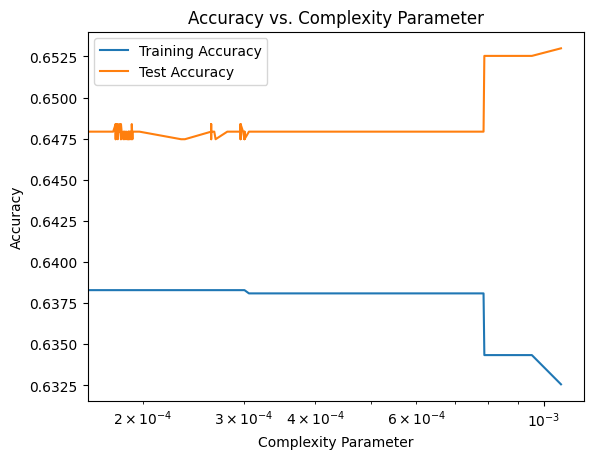

In [154]:
# valori di complessità candidati ad essere tagliati dal modello
# complexity_values = [0.001, 0.01, 0.1, 1, 10, 100]
ccp_alphas = path.ccp_alphas

# Addestra l'albero decisionale con diversi valori di complessità
train_accuracy = []
test_accuracy = []
for complexity in ccp_alphas:
    clf = DecisionTreeClassifier(max_depth=3, ccp_alpha=complexity)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Plotta l'accuratezza del modello in funzione del parametro di complessità
plt.plot(ccp_alphas, train_accuracy, label='Training Accuracy')
plt.plot(ccp_alphas, test_accuracy, label='Test Accuracy')
plt.xlabel('Complexity Parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Complexity Parameter')
plt.xscale('log')
plt.legend()
plt.show()

In [141]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.000973914549267707


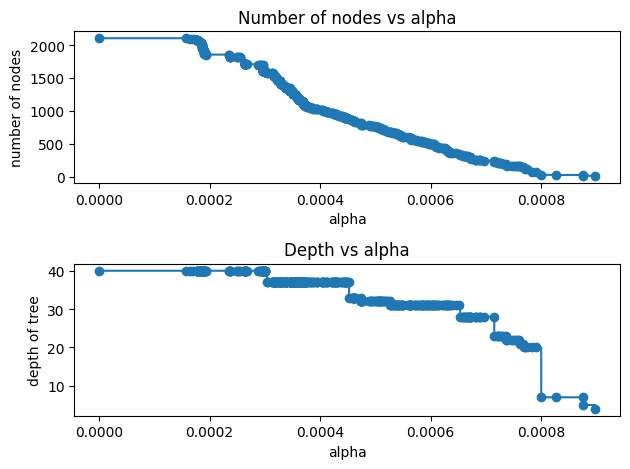

In [142]:
clfs = clfs[:-1]
complexity_values = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(complexity_values, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(complexity_values, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [143]:
# Potiamo albero con alpha=0.001
clf_pruned = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.0008)
clf_pruned.fit(X_train, y_train)

accuracy_pruned = clf_pruned.score(X_test, y_test)
print(accuracy_pruned)

0.6534562211981567


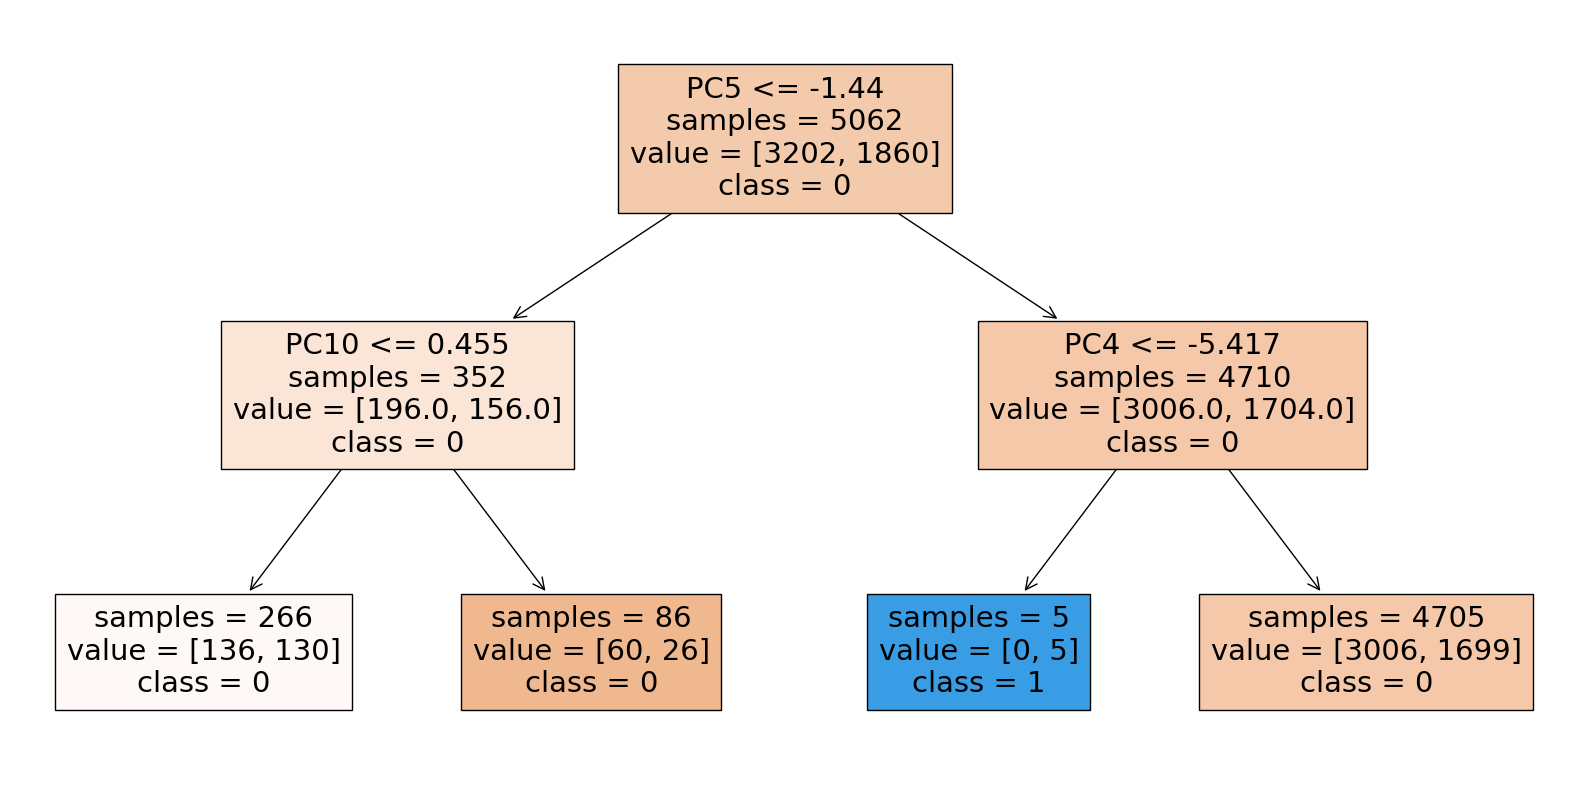

Confusion matrix:
 [[1417    0]
 [ 752    1]]

Accuracy: 0.6534562211981567


In [144]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf_pruned,
          feature_names=X_train.columns,
          class_names=[str(x) for x in clf_pruned.classes_],
          filled=True,
          ax=ax,
          impurity=False)

plt.show()
from sklearn.metrics import confusion_matrix

y_pred = clf_pruned.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)
print("\nAccuracy:", cm.diagonal().sum() / cm.sum())